In [17]:
import os
import pandas as pd

# 폰트설정
import matplotlib.font_manager as fm
from matplotlib import rc

rc('font', family=fm.FontProperties(fname='C:/Users/HYUK/AppData/Local/Microsoft/Windows/Fonts/NotoSansKR-Thin.ttf').get_name())


dir_path = "../predict_csv/"

# 해당 위치에 존재하는 파일들을 리스트로 반환하는 함수
def get_file_list(directory):
    file_list = []

    # 디렉터리 내의 모든 항목에 대해 반복합니다.
    for item in os.listdir(directory):
        # 전체 경로를 생성합니다.
        item_path = os.path.join(directory, item)

        # 파일인 경우에만 리스트에 추가합니다.
        if os.path.isfile(item_path):
            file_list.append(item)

    return file_list

file_path = get_file_list(dir_path)
print(file_path)

def read_csv(dir_path : str, file_path : str, do_print : bool = True):
    df = pd.read_csv(dir_path+file_path)
    if do_print :
        print(file_path,"\n")
        print("데이터 프레임 구조:", df.shape,"\n")
        print(df.head())
        print("\n데이터 정보 :\n")
        print(df.info())
        print("\nNan 값 존재 데이터")
        print(df[df.isnull().any(axis=1)])
    return df

def save_csv(dir_path : str, file_path : str,  df : pd.DataFrame ):
    new_data_path = dir_path+file_path
    
    data_path_os = os.path.dirname(new_data_path)
    if not os.path.exists(data_path_os):
        os.makedirs(data_path_os)

    
    # 데이터 저장
    df.to_csv(dir_path+file_path, index=True)

['Predict.csv']


In [18]:
df = read_csv(dir_path,"Predict.csv")
df.set_index("변환", inplace=True)

Predict.csv 

데이터 프레임 구조: (232, 8) 

        변환  미국금리  실업률  기업대출  가계대출  주택매매가격지수_변동율  통화량_변동율  기준금리
0  2003/12  1.00  3.7   1.9   1.8          -0.8      0.6  3.75
1  2004/12  2.25  3.8   1.8   1.7          -0.3      0.6  3.25
2  2005/05  3.00  3.7   2.4   1.9           0.5      0.3  3.25
3  2005/06  3.25  3.8   1.8   1.5           0.8      1.1  3.25
4  2005/07  3.25  3.8   2.0   1.6           0.7      0.9  3.25

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   변환            232 non-null    object 
 1   미국금리          232 non-null    float64
 2   실업률           232 non-null    float64
 3   기업대출          232 non-null    float64
 4   가계대출          232 non-null    float64
 5   주택매매가격지수_변동율  232 non-null    float64
 6   통화량_변동율       232 non-null    float64
 7   기준금리          232 non-null    float64
dtypes: float64(7), object(1)
memory usa

C:\Users\HYUK\AppData\Local\Temp\ipykernel_18012\2397857165.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)  # 인덱스를 datetime 형식으로 변환


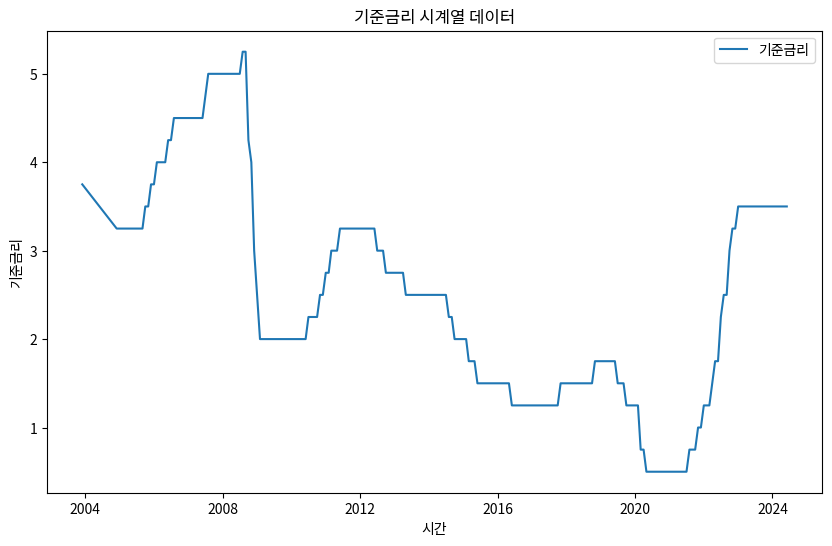

<Figure size 1200x600 with 0 Axes>

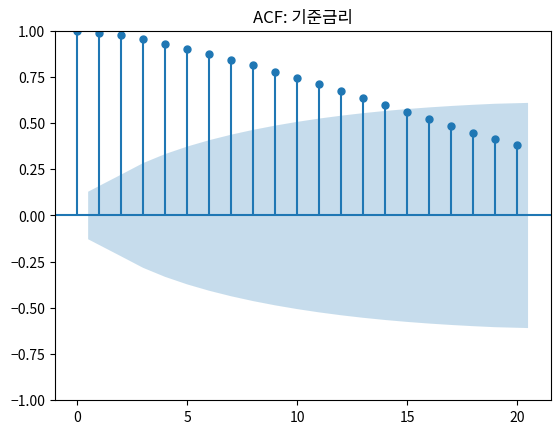

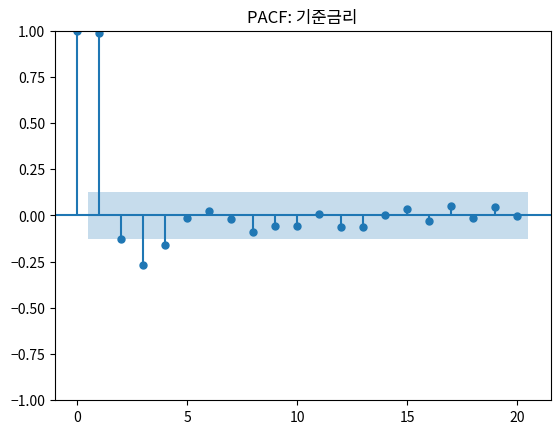

KeyError: '기준금리'

In [19]:
import pandas as pd  # 데이터 처리를 위한 pandas
import matplotlib.pyplot as plt  # 시각화를 위한 matplotlib
from statsmodels.tsa.arima.model import ARIMA  # ARIMA 모델 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # ACF와 PACF 플롯 함수
from sklearn.metrics import mean_squared_error  # 예측 성능 평가를 위한 MSE

# CSV 파일 불러오기
# `dir_path`는 파일 경로로 사용자가 제공한 디렉토리 경로
# file_path = "Predict.csv"  # 파일 이름
# df = pd.read_csv(file_path)  # 데이터를 pandas DataFrame으로 읽어오기

# "변환" 컬럼을 인덱스로 설정
# df.set_index("변환", inplace=True)  # 기존 인덱스를 제거하고 "변환"을 새 인덱스로 설정
df.index = pd.to_datetime(df.index)  # 인덱스를 datetime 형식으로 변환

# "기준금리" 데이터 추출
target_series = df["기준금리"]  # 예측 대상 컬럼

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(target_series, label="기준금리")
plt.title("기준금리 시계열 데이터")
plt.xlabel("시간")
plt.ylabel("기준금리")
plt.legend()
plt.show()

# ACF와 PACF 플롯 그리기
plt.figure(figsize=(12, 6))
plot_acf(target_series, lags=20, title="ACF: 기준금리")
plot_pacf(target_series, lags=20, title="PACF: 기준금리")
plt.show()

#데이터 분할하기
import matplotlib.pyplot as plt
df_train = pd.DataFrame(target_series['기준금리'][:int(0.8*len(target_series))])
df_test = pd.DataFrame(target_series['기준금리'][int(0.8*len(target_series)):])
df_train['date'] = target_series['시간'][:int(0.8*len(target_series))]
df_test['date'] = target_series['시간'][int(0.8*len(target_series)):]
# # ARIMA 모델 파라미터 설정 (p, d, q)
# # p, d, q 값은 ACF와 PACF 플롯을 참조해 결정하거나 여러 조합으로 테스트
# p, d, q = 2, 1, 2

# # ARIMA 모델 생성 및 학습
# model = ARIMA(target_series, order=(p, d, q))  # ARIMA 모델 초기화
# fitted_model = model.fit()  # 모델 학습

# # 학습 결과 요약 출력
# print(fitted_model.summary())  # ARIMA 모델의 통계적 요약 정보 출력

# # 예측 수행 (향후 12개월)
# forecast_steps = 12  # 예측할 기간 (12개월)
# forecast = fitted_model.forecast(steps=forecast_steps)  # 예측 결과

# # 예측 결과 시각화
# plt.figure(figsize=(10, 6))
# plt.plot(target_series, label="기준금리 (실제 데이터)")
# plt.plot(forecast, label="기준금리 (예측 데이터)", linestyle="--")
# plt.title("기준금리 예측 결과")
# plt.xlabel("시간")
# plt.ylabel("기준금리")
# plt.legend()
# plt.show()

# # 성능 평가 (훈련 데이터 기준)
# train_predictions = fitted_model.predict(start=0, end=len(target_series)-1)
# mse = mean_squared_error(target_series, train_predictions)  # MSE 계산
# print(f"훈련 데이터에 대한 MSE: {mse:.2f}")
